In [136]:
import json

def write_json(dict, label): # wirte the new state into new txt file
    file_name_output=label+'.json'
    print('saving file:',file_name_output)
    with open(file_name_output, 'w') as f:
        json.dump(dict, f)

def write_txt(content, label): # wirte the new state into new txt file
    file_name_output=label+'.txt'
    print('saving file:',file_name_output)
    with open(file_name_output, 'w') as f:
        f.write(content)


In [137]:
import tensorflow as tf
AUTO = tf.data.experimental.AUTOTUNE
from matplotlib.image import imread

def img_decoder(path, label=None):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    # img = tf.image.resize(img, [224, 224])
    img = tf.image.resize(img, [84, 84])
    img = tf.cast(img, tf.float32) / 255.0
    if label == None:
        return img
    return img, label

def list_img(img):
    list_img=[]
    for i in range(len(img)):
        divider = int(len(img[i])/4)
        # divider = 21
        for j in range(divider):
            list_img.append(img[i][j][0])
            list_img.append(img[i][j][1])
            list_img.append(img[i][j][2])
            list_img.append(img[i][j+divider][0])
            list_img.append(img[i][j+divider][1])
            list_img.append(img[i][j+divider][2])
            list_img.append(img[i][j+divider*2][0])
            list_img.append(img[i][j+divider*2][1])
            list_img.append(img[i][j+divider*2][2])
            list_img.append(img[i][j+divider*3][0])
            list_img.append(img[i][j+divider*3][1])
            list_img.append(img[i][j+divider*3][2])
    return list_img

def img_decode_list(path_):
    return list_img(imread(path_))



In [138]:
import pandas as pd
from matplotlib.image import imread
import os

# Function that searches the folder for image files, converts them to a tensor
def create_imgs_matrix(directory):
    # global img_matrix, image_files
    img_matrix = []
    image_files = []
    # create list of all files in directory     
    folder_files = [filename for filename in os.listdir(directory)]  
    # create images matrix   
    for filename in folder_files:
        # img = img_decoder(directory+filename, label=None)
        img = img_decode_list(directory+filename)
        img_matrix.append(img)
        image_files.append(directory+filename)
    img_matrix =  pd.DataFrame(img_matrix)
    return img_matrix, image_files
    
        

In [151]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_img_4(list_path_):
    fig, ax = plt.subplots(1, len(list_path_), figsize=(15, 5))
    i=0
    for file_ in list_path_:
        img = np.array(Image.open(file_))
        ax[i].imshow(img)
        i+=1
    plt.tight_layout()
    plt.show()

def show_line(list_path_):
    while list_path_:
        temp_path=[]
        for i in range(4):
            if list_path_:
                temp_path.append(list_path_.pop())
            else:
                break
        show_img_4(temp_path)

In [152]:
from sklearn.ensemble import IsolationForest

def isolate_forest(path_):
    # path_='.\\Topic_5_Data\\ISIC84by84\\train\\SCC\\'
    img_matrix, image_files = create_imgs_matrix(path_)
    print(img_matrix.shape)
    model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05),random_state=0)
    model.fit(img_matrix)
    outliers = model.predict(img_matrix)
    print(np.unique(outliers, return_counts=True))
    i=0
    outliers_path_=[]
    for outlier in outliers:
        if outlier == -1:
            print(image_files[i])
            outliers_path_.append(image_files[i])
        i+=1
    return outliers_path_

finding outliers of DF by isolation forest
processing total 139 images files
(139, 21168)
(array([-1,  1]), array([  7, 132], dtype=int64))
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0028880.jpg
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0054978.jpg
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0058328.jpg
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0058565.jpg
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0067480.jpg
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0068613.jpg
.\Topic_5_Data\ISIC84by84\train\\DF\ISIC_0069469.jpg
saving file: .\output\dict_outliers_DF.json


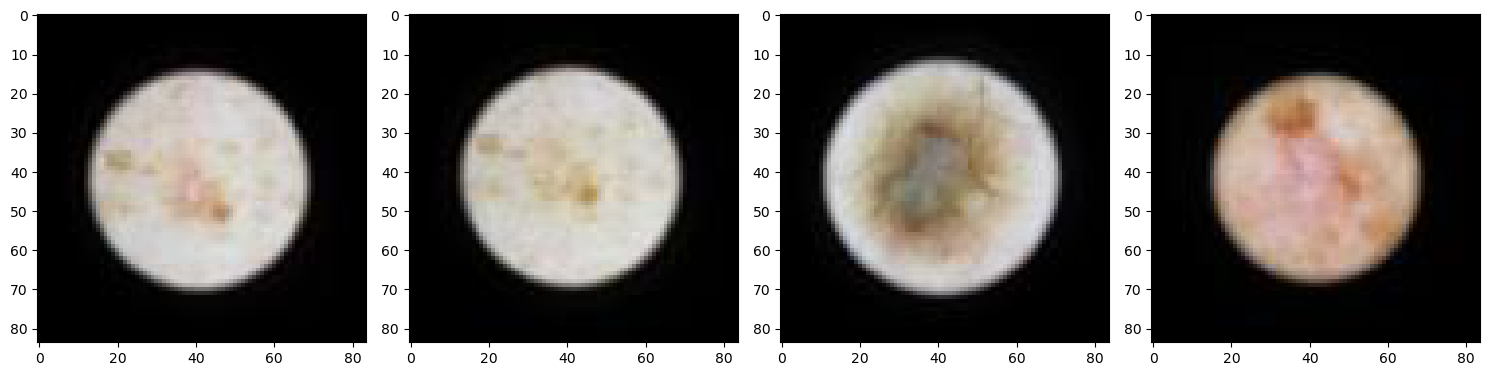

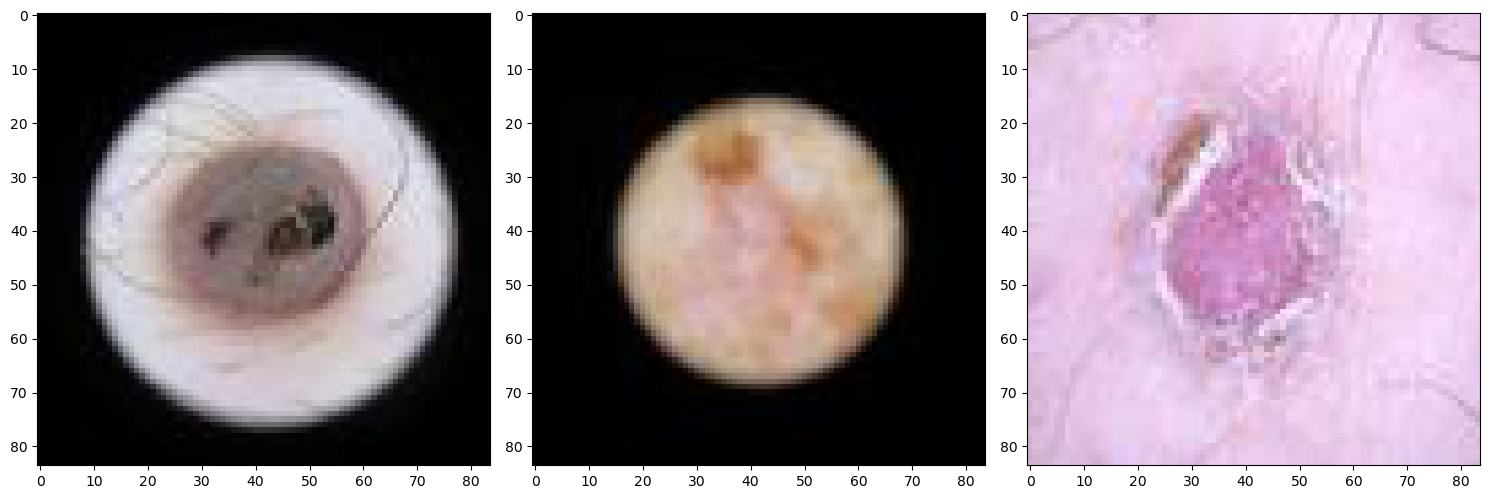

finding outliers of VASC by isolation forest
processing total 153 images files
(153, 21168)
(array([-1,  1]), array([  8, 145], dtype=int64))
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0030275.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0064323.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0064682.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0066504.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0068484.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0070356.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0071267.jpg
.\Topic_5_Data\ISIC84by84\train\\VASC\ISIC_0072012.jpg
saving file: .\output\dict_outliers_VASC.json


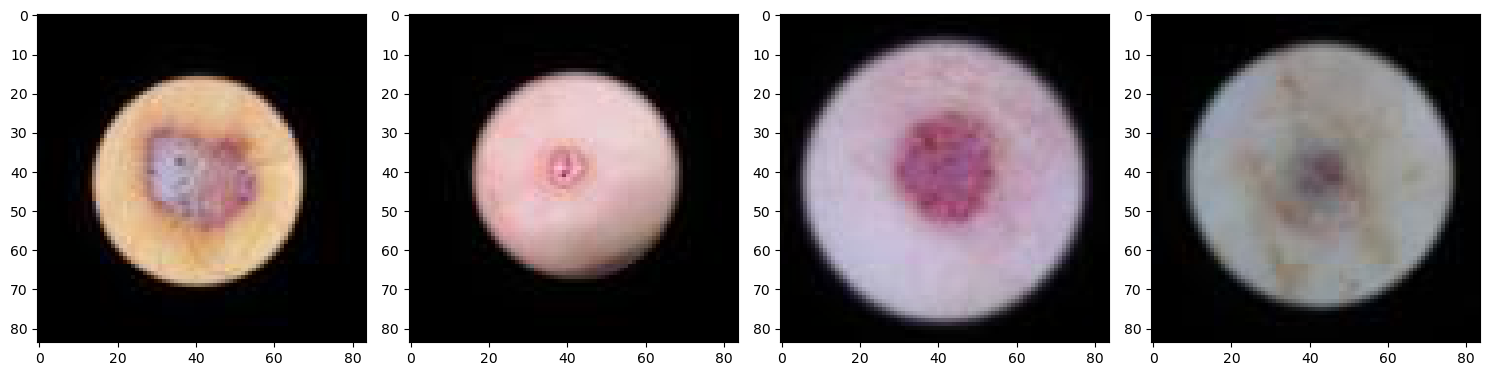

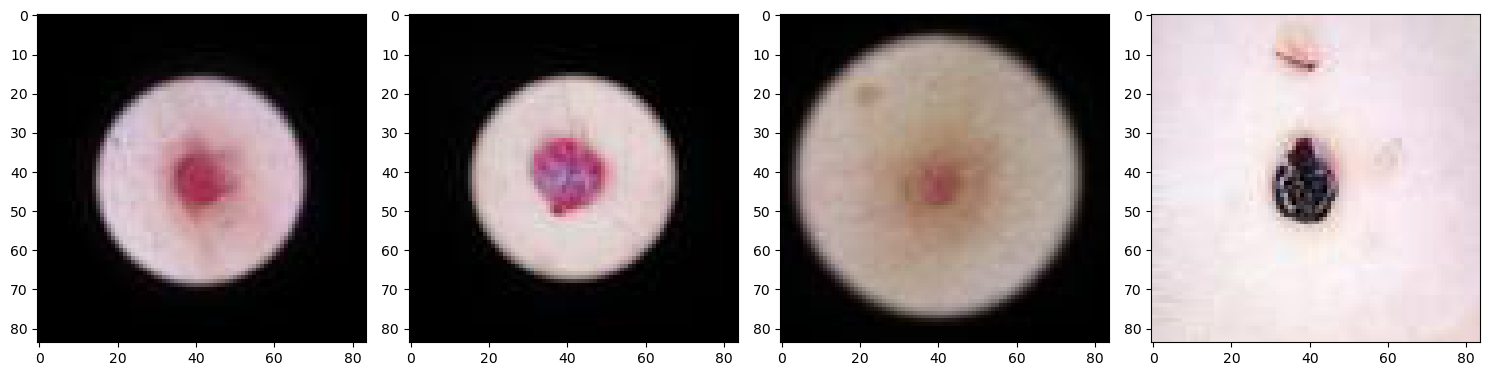

finding outliers of SCC by isolation forest
processing total 528 images files


KeyboardInterrupt: 

In [153]:

from glob import glob
import os

def get_labels(path_):
    return os.listdir(path_)

def get_counts(path_):
    return len(list(glob(path_+'\\*.jpg')))

path_='.\\Topic_5_Data\\ISIC84by84\\train\\'
# labels = get_labels(path_)
labels = ['DF','VASC','SCC','AK','BKL','BCC','MEL','NV'] 

for label in labels:
    dict_outliers = {}
    path_temp= f'{path_}\\{label}\\'
    print(f'finding outliers of {label} by isolation forest')
    print(f'processing total {get_counts(path_temp)} images files')
    outliers_path_=isolate_forest(path_temp)
    dict_outliers[label]=outliers_path_
    write_json(dict_outliers, f'.\\output\\dict_outliers_{label}')
    show_line(outliers_path_)




(528, 21168)
(array([-1,  1]), array([ 27, 501], dtype=int64))
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0025539.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0025948.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0031191.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0053653.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0055350.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0056611.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0056621.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0056629.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0057510.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0058185.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0058305.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0058327.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0058741.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0060800.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0061016.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0061388.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\ISIC_0063730.jpg
.\Topic_5_Data\ISIC84by84\train\SCC\

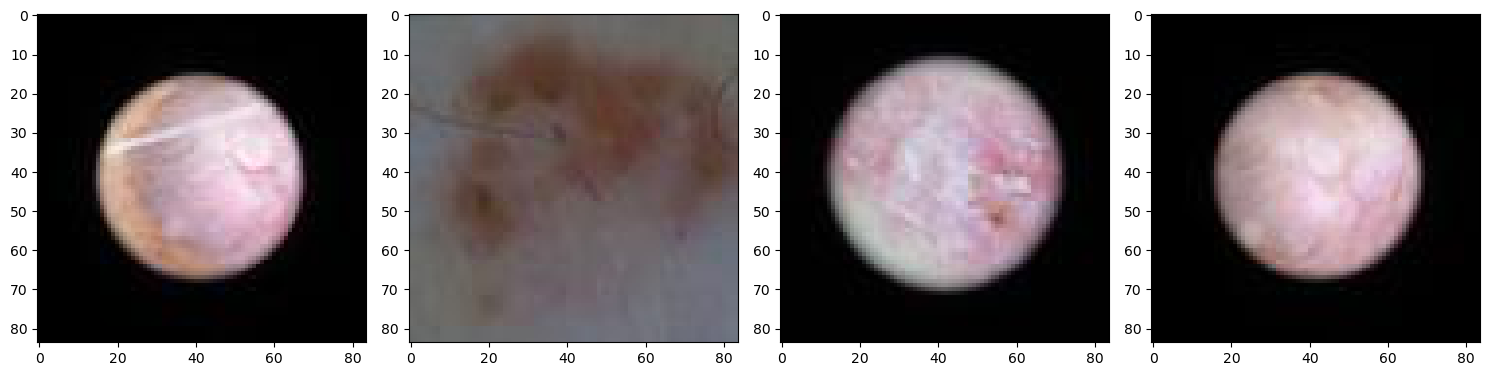

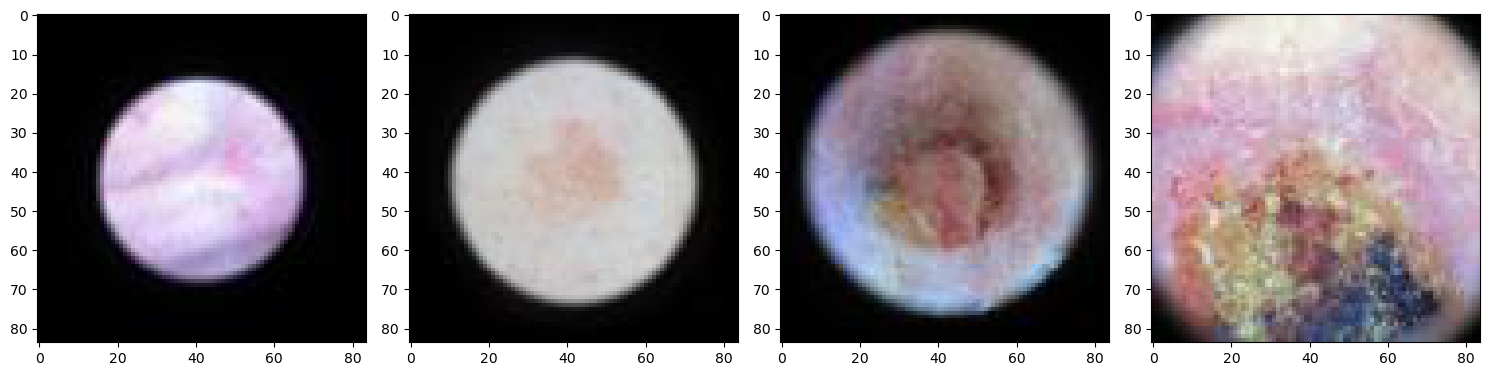

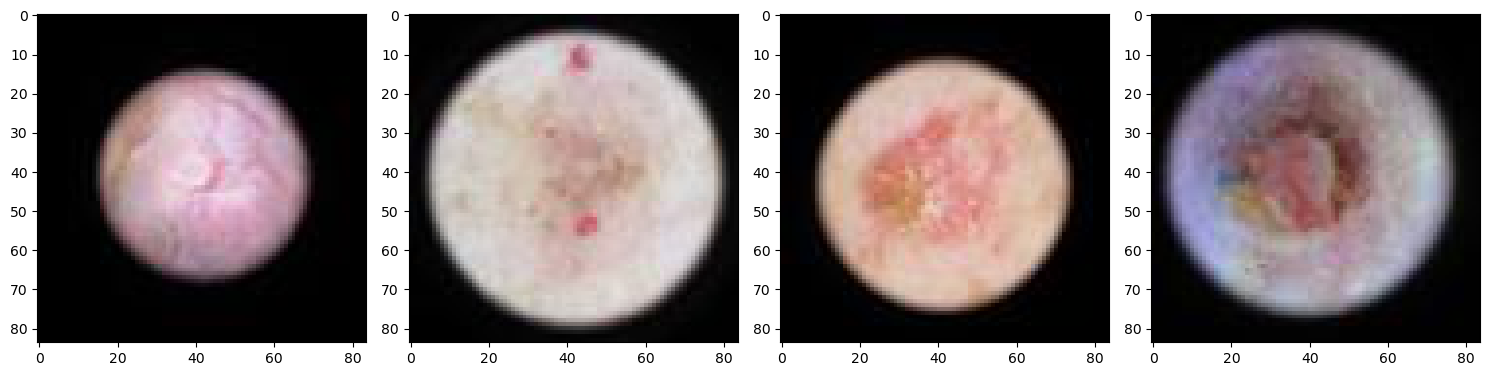

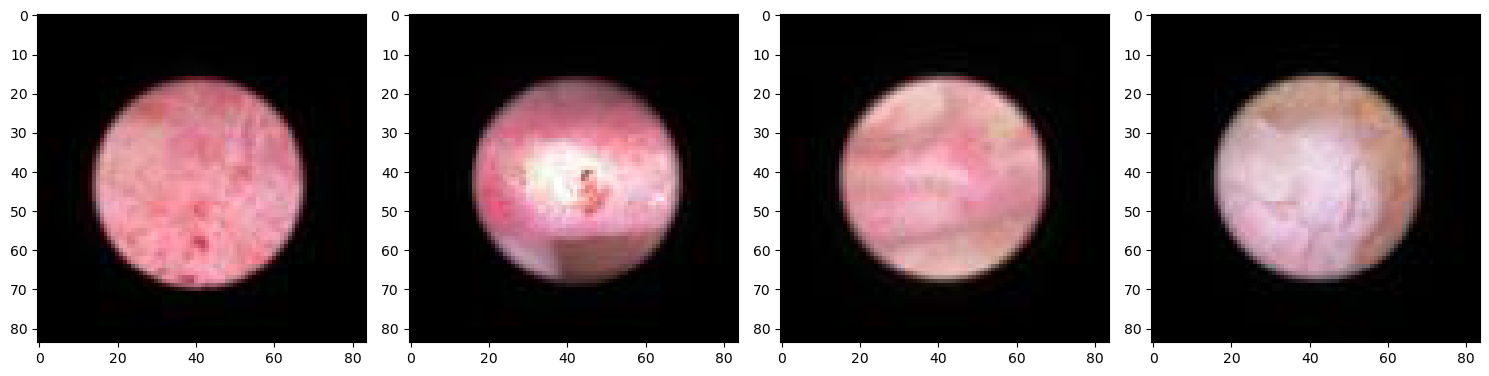

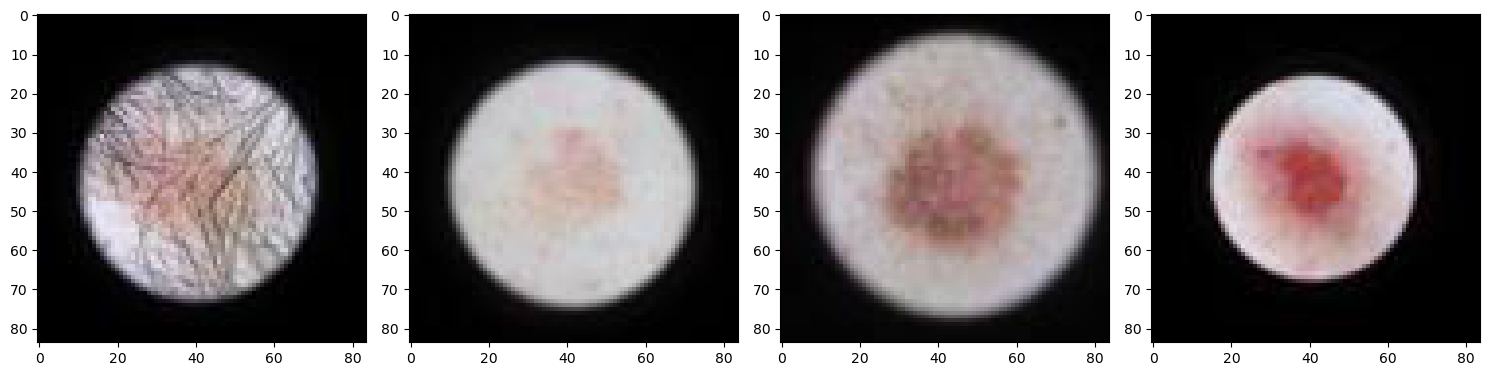

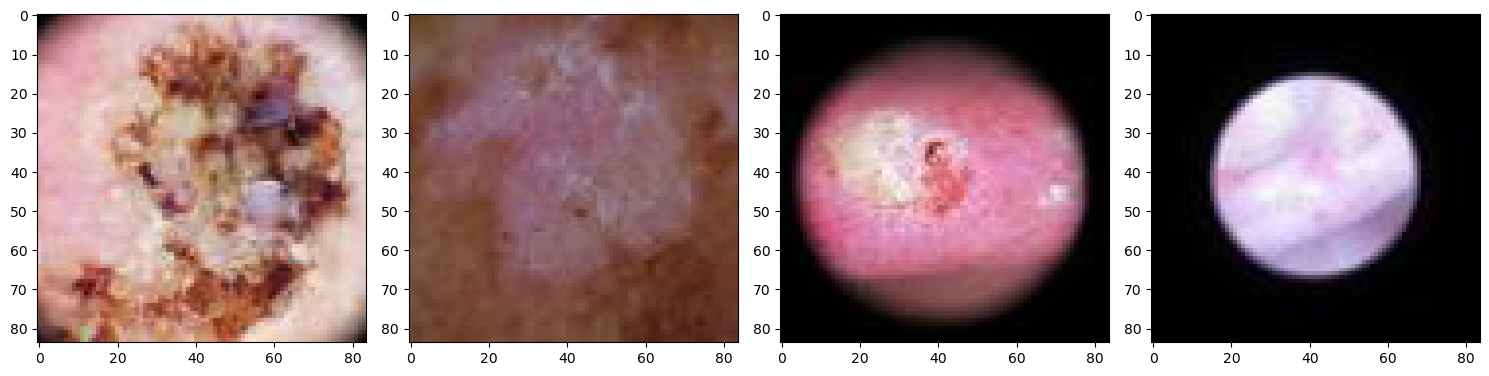

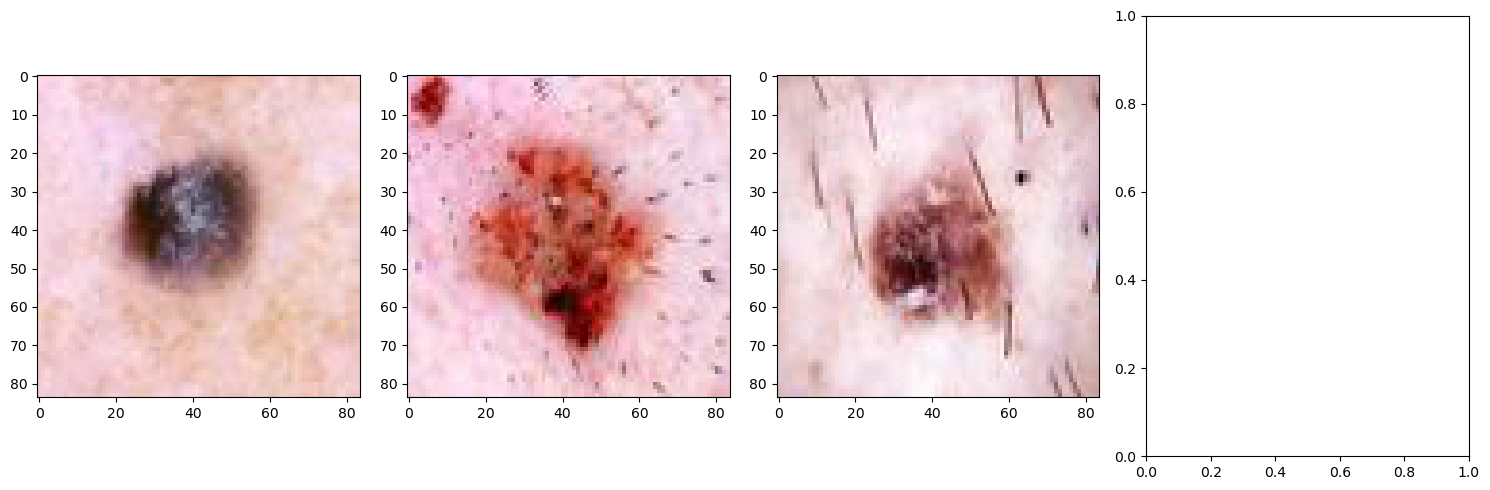

In [141]:
# path_='.\\Topic_5_Data\\ISIC84by84\\train\\SCC\\'
# outliers_path_=isolate_forest(path_)
# show_line(outliers_path_)

In [ ]:
# AK : 735
# BCC : 3223
# BKL : 2524
# DF : 139
# MEL : 4422
# NV : 12775
# SCC : 528
# VASC : 153
